# 1. About Dataset

The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.
he columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

https://www.kaggle.com/datasets/sagnik1511/car-insurance-data?select=Car_Insurance_Claim.csv

# 2. Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Loading and Overview

In [1]:
data = pd.read_csv('Car_Insurance_Claim.csv')

NameError: name 'pd' is not defined

An overview shows that the majority of features are categorical variabels except "CREDIT_SCORE" and "ANNUAL_MILAGE. In the furthtre sections encoding the variables will be discussed. Besides there are some missing values for "ANNUAL_MILEAGE" and  "CREDIT_SCORE".

In [32]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

# 4. Exploratory Data Analysis

A group of barcharts was plotted based on the features of the dataset. As can be seen:

The number of men and women in the dataset is almost equal. 
The number of people who have got married is almost equal to the ones who are single. 
The majority of customers own cars. 
The most frequent type of car is sedan. 
The number of cars which were produced before 2015 is almost three times higher than those were produced after 2015. 
About 40 percent of costumers belongs to upper class income. 
About 50 percent of costumers had not had speed violations.
Pepole within age group 26-39 and 40-64 are the most frequent drivers.
Drivers with 0-9 and 10-19 years of driving experience compromise the major drivers. 

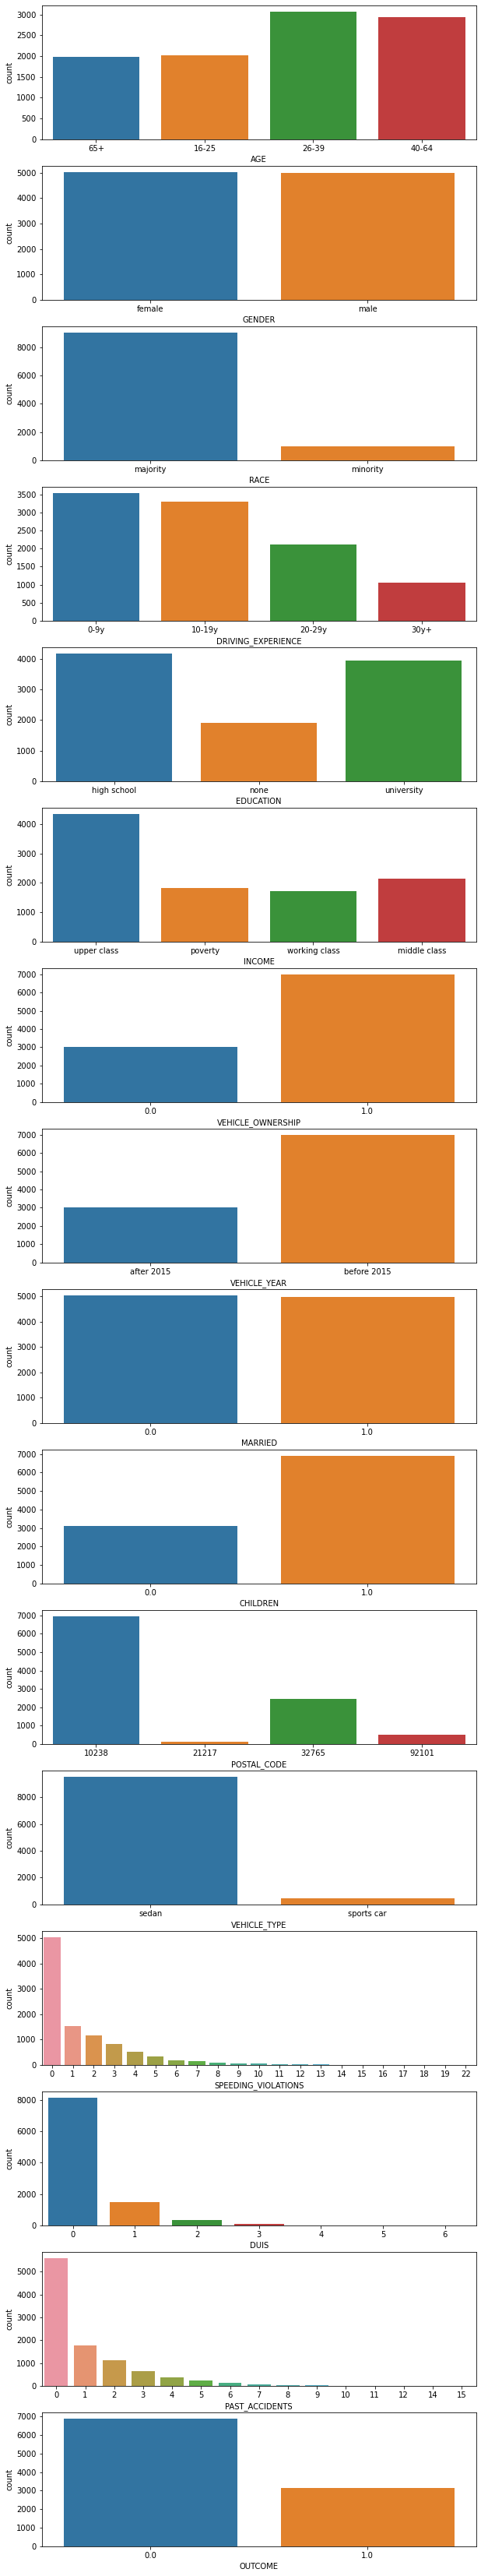

In [12]:
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(10,60))
j=0
for i in data.drop(['ID','CREDIT_SCORE','ANNUAL_MILEAGE'],axis=1).columns:
    sns.countplot(data=data, x=i, ax=axes[j])
    j+=1

A group of barcharts of the features of the dataset was plotted by dividing them based on the outcome feature.
In summary: 

In all group ages,except people between 16-25, the number of people who had claimed their loan is less than people who they had not claimed. 
The Gender of people had not specific relation with their claim. 
Less experienced drivers (0-9 years of driving experience) cailmed more than other groups for their loan.


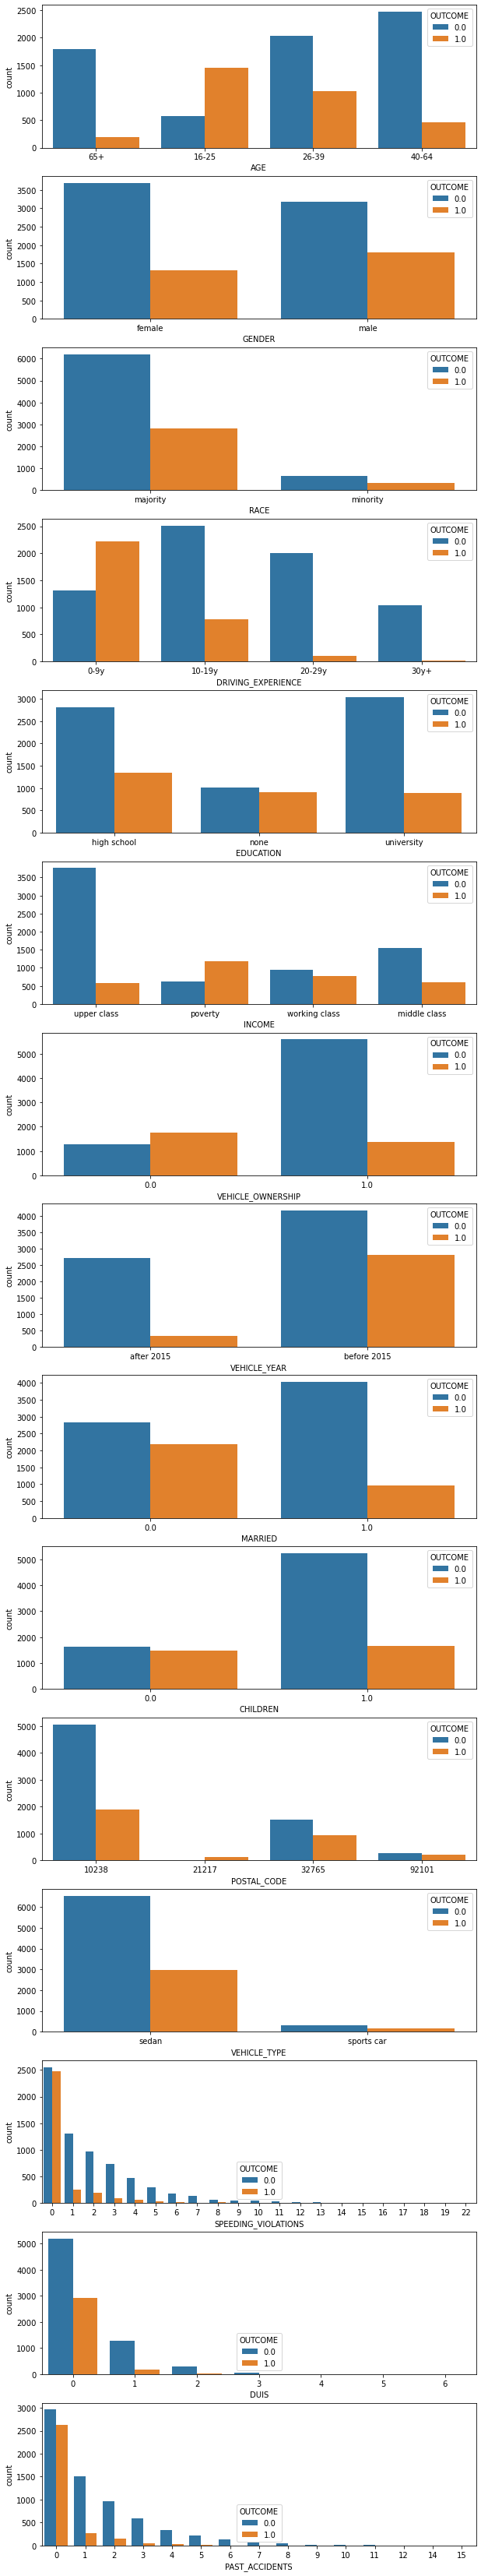

In [17]:
fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(10,60))
j=0
for i in data.drop(['ID','CREDIT_SCORE','ANNUAL_MILEAGE', 'OUTCOME'],axis=1).columns:
    sns.countplot(data=data, x=i, ax=axes[j], hue= 'OUTCOME')
    j+=1

According to the distibution plots of "ANNUAL_MILAGE" and "CREDIT_SCORE", they both have a normal distribution.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL_MILEAGE'>

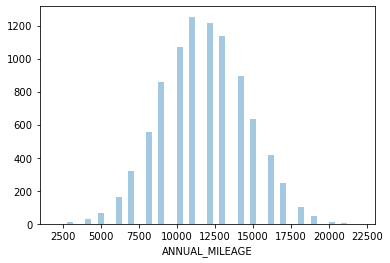

In [5]:
sns.distplot(data['ANNUAL_MILEAGE'], kde = False)

<AxesSubplot:xlabel='CREDIT_SCORE'>

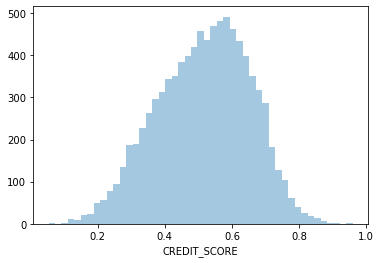

In [6]:
sns.distplot(data['CREDIT_SCORE'], kde = False)

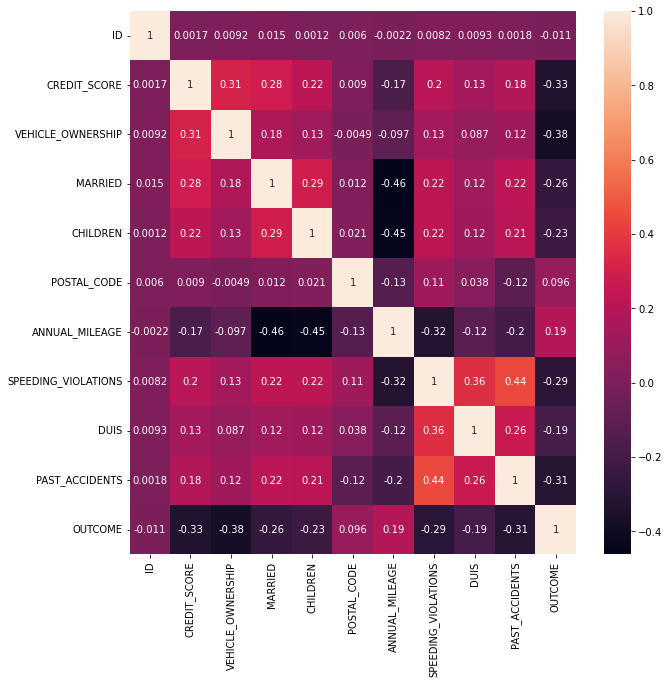

In [23]:
corr_matrix = data.corr()
fig, axes = plt.subplots(figsize=(10, 10))
axes = sns.heatmap(corr_matrix, annot=True)

According to correlation matrix, annula milage has a negative correlation with children and married. In addition speeding violation is correlated with past accident and DUIS. 


<AxesSubplot:title={'center':'Corrolation with Outcome'}>

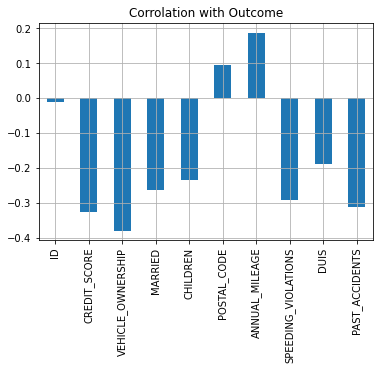

In [19]:
data.drop('OUTCOME', axis=1).corrwith(data.OUTCOME).plot(kind = 'bar', grid=True, title='Corrolation with Outcome')

As can be seen ID and POSTAL_CODE had the least correlation

# 5. Preprocessing

## 5.1 Missing values

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1 ,keys =['Total', 'Percent'])
missing_values

,Total,Percent
CREDIT_SCORE,982,0.108893
ANNUAL_MILEAGE,957,0.105828
ID,0,0.000000
MARRIED,0,0.000000
PAST_ACCIDENTS,0,0.000000
DUIS,0,0.000000
SPEEDING_VIOLATIONS,0,0.000000
VEHICLE_TYPE,0,0.000000
POSTAL_CODE,0,0.000000
CHILDREN,0,0.000000


In [ ]:
#missing values of annul_milage were filled by the mean of the feature because the feature had a normal distribution

In [33]:
amm = data['ANNUAL_MILEAGE'].mean()
data['ANNUAL_MILEAGE'].fillna(value=amm, inplace=True) 


In [ ]:
#missing values of CREDIT_SCORE were filled by the mean of the feature because the feature had a normal distribution

In [34]:
csm = data['CREDIT_SCORE'].mean()
data['CREDIT_SCORE'].fillna(value=csm, inplace=True)


<AxesSubplot:>

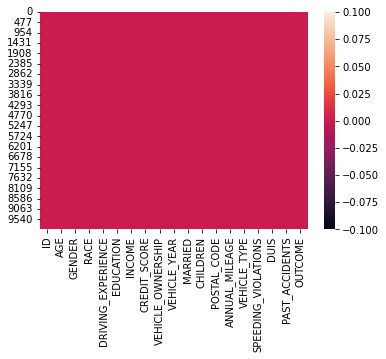

In [71]:
sns.heatmap(data.isnull()) #To find any possible missing values

## 5.2 Encoding

Among the categorical variables income and education were ordinal variables. Therefore these variables were encoded as their priority. For example income was sorted as: 'poverty', 'working class', 'middle class', 'upper class' and the corresponding classes were took integeres 0 to 3. 

Driving experince and age were coded as categrical variables in the origin dataset. They were converted to integer variables by considering the median of each group. For exaple 20.5 was replaced by age group 16-25.
Other variables were encoded binary (one-hot).

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
enc = OrdinalEncoder()
income = ['poverty', 'working class', 'middle class', 'upper class']
enc = OrdinalEncoder(categories=[income])
encoded_income = enc.fit_transform(data[['INCOME']])
encoded_income = pd.DataFrame(encoded_income, columns=['ENCODED_INCOME'])

In [36]:
enc = OrdinalEncoder()
education = ['none', 'high school', 'university']
enc = OrdinalEncoder(categories=[education])
encoded_education = enc.fit_transform(data[['EDUCATION']])
encoded_education = pd.DataFrame(encoded_education, columns=['ENCODED_EDUCATION'])

In [37]:
data["DRIVING_EXPERIENCE"].replace({"0-9y": 4.5, "10-19y": 14.5 ,"20-29y": 24.5 ,"30y+": 45}, inplace=True)
#It is supposed that the oldest driver is 80. Therefore the median for 30y+ will be 45

In [38]:
data["AGE"].replace({"16-25": 20.5, "26-39": 32.5 ,"40-64": 52 ,"65+": 72.5}, inplace=True)

In [39]:
sports_car = pd.get_dummies(data['VEHICLE_TYPE'] , drop_first = True)

In [40]:
minority = pd.get_dummies(data['RACE'] , drop_first = True)

In [41]:
male = pd.get_dummies(data['GENDER'] , drop_first = True)

In [42]:
vehicle_before2015 = pd.get_dummies(data['VEHICLE_YEAR'] , drop_first = True)

In [43]:
vehicle_before2015.rename(columns={"before 2015": "vehicle_before2015"})

,vehicle_before2015
0,0
1,1
2,1
3,1
4,1
...,...
9995,1
9996,0
9997,1
9998,1


In [38]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [39]:
insurance = data.copy()

In [44]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,72.5,female,majority,4.5,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,20.5,male,majority,4.5,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,20.5,female,majority,4.5,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,20.5,male,majority,4.5,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,32.5,male,majority,14.5,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [45]:
data.drop(['ID', 'POSTAL_CODE', 'GENDER', 'EDUCATION', 'RACE', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], axis=1, inplace=True)

In [15]:
data.head()

,AGE,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,72.5,0-9y,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0
1,20.5,0-9y,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0
2,20.5,0-9y,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0
3,20.5,0-9y,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0
4,32.5,10-19y,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0


In [46]:
data = pd.concat([data, sports_car, minority, vehicle_before2015, male, encoded_education, encoded_income], axis=1)

In [47]:
data.head()

,AGE,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,sports car,minority,before 2015,male,ENCODED_EDUCATION,ENCODED_INCOME
0,72.5,4.5,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0,0,0,0,0,1.0,3.0
1,20.5,4.5,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0,0,0,1,1,0.0,0.0
2,20.5,4.5,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0,0,0,1,0,1.0,1.0
3,20.5,4.5,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0,0,0,1,1,2.0,1.0
4,32.5,14.5,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,0,1,1,0.0,1.0


# 6. Modeling

Logistic regression and XGBoost were fitted to the dataset.

## 6.1 Logistic Regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 6.1.1 Data Spliting and standardization

In [47]:
X = data.drop('OUTCOME', axis=1)
y = data['OUTCOME']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
X_valid, X_test, y_valid, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

### 6.1.2 Hyperparameters Tuning

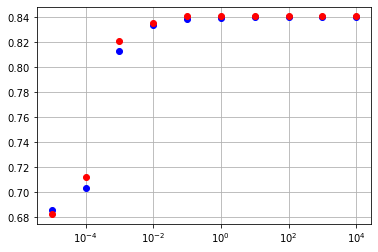

In [51]:
C=[0.00001,0.0001,0.001,0.01,0.1, 1, 10, 100,1000, 10000]
train_acc = []
valid_acc = []

for c in C:
    clf = LogisticRegression(C=c, max_iter=200)
    clf.fit(X_train, y_train)
    pred_valid = clf.predict(X_valid)
    pred_train = clf.predict(X_train)
    
    train_acc.append(accuracy_score(y_train, pred_train))
    valid_acc.append(accuracy_score(y_valid, pred_valid))
    
plt.plot(C,train_acc, 'bo')
plt.plot(C, valid_acc, 'ro')
plt.xscale('log')
plt.grid()

### 6.1.3 Model Score

In [52]:
clf = LogisticRegression(C=10, max_iter=200)

In [53]:
clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200)

In [54]:
predictions = clf.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1039
         1.0       0.77      0.71      0.74       461

    accuracy                           0.85      1500
   macro avg       0.82      0.81      0.82      1500
weighted avg       0.84      0.85      0.85      1500



In [56]:
clf.score(X_test, y_test)

0.8473333333333334

In [57]:
 cm = confusion_matrix(y_test, predictions)

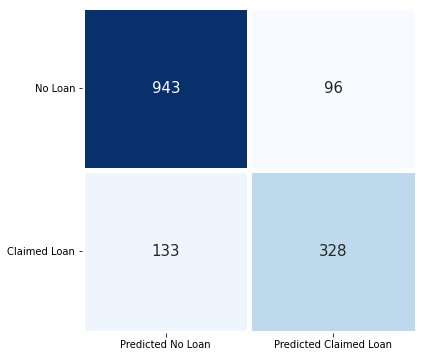

In [58]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()


## 6.2 XGBoost

In [59]:
import xgboost
from xgboost import XGBClassifier

### 6.2.1 Data Spliting and standardization

In [63]:
X = data.drop('OUTCOME', axis=1)
y = data['OUTCOME']

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
X_valid, X_test, y_valid, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

### 6.2.3 Hyperparameters Tuning

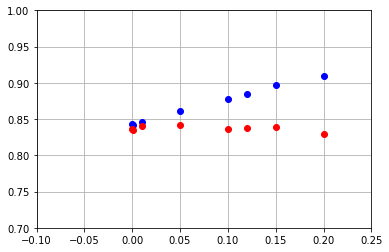

In [67]:
learning_rate=[0.0001,0.001, 0.01, 0.05, 0.1, 0.12, 0.15, 0.2]
train_acc = []
valid_acc = []

for lr in learning_rate:
    clf = XGBClassifier(learning_rate = lr)
    clf.fit(X_train, y_train)
    pred_valid = clf.predict(X_valid)
    pred_train = clf.predict(X_train)
    
    train_acc.append(accuracy_score(y_train, pred_train))
    valid_acc.append(accuracy_score(y_valid, pred_valid))
    
plt.plot(learning_rate,train_acc, 'bo')
plt.plot(learning_rate, valid_acc, 'ro')
plt.xlim([-0.1,.25])
plt.ylim([0.7,1])


plt.grid()

In [68]:
xgbc = XGBClassifier(learning_rate = 0.01) #the model with learning rate = 0.01 was fitted.

In [69]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
predictions = xgbc.predict(X_test)

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1039
         1.0       0.77      0.71      0.74       461

    accuracy                           0.85      1500
   macro avg       0.82      0.81      0.82      1500
weighted avg       0.84      0.85      0.84      1500



In [72]:
 cm = confusion_matrix(y_test, predictions)

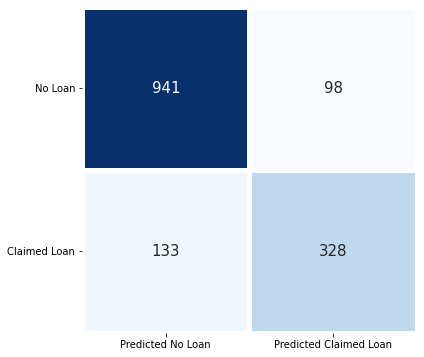

In [73]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()


In [74]:
xgbc.score(X_test, y_test)

0.846

# 7. Summary

After conducting significant data analysis, I experimented with two classification models to see how well they performed on the dataset. With accuracy, precision, and recall score, I obtained quite decent results.

After Tuning the Hyperparameter 
Logistic Regression had Accuracy of 84.73%
XGBoost algorithm had Accuracy of 84.6%
